# Урок 3. Логистическая регрессия. Log Loss

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1">Логистическая регрессия</a></span></li><li><span><a href="#Логистическая-функция-потерь" data-toc-modified-id="Логистическая-функция-потерь-2">Логистическая функция потерь</a></span></li><li><span><a href="#Пример" data-toc-modified-id="Пример-3">Пример</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [290]:
import numpy as np
import matplotlib.pyplot as plt

In [291]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Логистическая регрессия

Обобщение линейной регрессии на задачу классификации.

<img src='img/algorithmes-de-classification-regression-logistique-9.jpg' width=400 align='left'> </img>

$\vec{y}=X\vec{w}$

Проблемы:  
1) Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   
np.dot(X, w) = [-12, 2, 1.5, 0.0005, 1000 ...]  
2) MSE, как функция потерь, не подходит.

p = [0, 1] - вероятность

$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$ - шансы

In [292]:
0.5 / (1 - 0.5)

1.0

In [293]:
0.01 / (1 - 0.01)

0.010101010101010102

In [294]:
0.9 / (1 - 0.9)

9.000000000000002

In [295]:
p = 1e-2
np.log(p / (1 - p))                       

-4.59511985013459

In [296]:
p = 0.99
np.log(p / (1 - p))

4.595119850134589

$$X\vec{w} = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\exp(X\vec{w}) = \frac{\vec{p}}{1 - \vec{p}}$$
$$(1-\vec{p})\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})-\vec{p}\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})=\vec{p}(1+\exp(X\vec{w}))$$
$$\vec{p}=\frac{\exp{(X\vec{w})}}{1+\exp{(X\vec{w})}}$$
$$\vec{p}=\frac{1}{1+\exp{(-X\vec{w})}}=\text{sigmoid}(-X\vec {w})$$

In [297]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

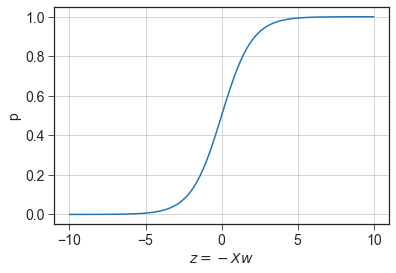

In [298]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=-Xw$')
plt.ylabel('p')
plt.grid();

### Логистическая функция потерь 

для одного объекта: $\text{logloss}=-{y} \ln({p}) - (1-{y})\ln(1-{p})$

$y=0/1$ - истинный класс   
$p=[0,1]$ - ответ алгоритма


In [299]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [300]:
# Пример применения
y_true = 1
y_pred = 0.9
calc_logloss(y_true, y_pred)

0.10536051565782628

$$\text{logloss}=\frac{1}{n}\big(-\vec{y} \ln(\vec{p}) - (1-\vec{y})\ln(1-\vec{p})\big)$$
$$\vec{p}=\text{sigmoid}(-X{\vec{w}})=\frac{1}{1+\text{exp}(-X{\vec{w}})}$$
$$\frac{\mathrm d}{\mathrm d\vec{w}}\text{logloss}=\frac{1}{n}(\vec{p}-\vec{y})X$$
$$\vec{w}=\vec{w}-\alpha \frac{1}{n}(\vec{p}-\vec{y})X$$

### Пример

In [301]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [302]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [303]:
# На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.
# Подберите аргументы функции eval_LR_model для логистической регрессии таким образом,
# чтобы log loss не превышал значение 0.3 (0.1). Как изменились веса?

In [304]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [305]:
w = eval_LR_model(X_st, y, 2000, 1e-1)

200 [-0.64245884 -0.81575707  1.11680356  1.72702881] 0.4995552177931558
400 [-1.25432451 -0.91736333  1.05455726  2.24457861] 0.4664467561141666
600 [-1.80755433 -0.96270374  0.90904148  2.64183838] 0.44201377632900957
800 [-2.31113497 -0.98420861  0.73842971  2.97447927] 0.42228858977623335
1000 [-2.77136565 -0.99588853  0.56641089  3.26813012] 0.40587815270727734
1200 [-3.193644   -1.00399774  0.40259598  3.53557456] 0.3920245709386051
1400 [-3.58276075 -1.01127932  0.2502806   3.78366682] 0.38020124069063777
1600 [-3.9429576  -1.01884757  0.10992481  4.01638187] 0.37000858928583097
1800 [-4.27794785 -1.0270723  -0.01920407  4.23624356] 0.36113578827337056
2000 [-4.59094777 -1.0359998  -0.13825631  4.44501211] 0.35333924193451943


In [306]:
y_pred = sigmoid(np.dot(X_st, w))
print(y_pred.round(2))
print(y)
print(np.where(y_pred > 0.5, 1, 0))

[0.26 0.25 0.91 0.25 0.74 0.48 0.97 0.13 0.26 0.9 ]
[0 0 1 0 1 0 1 0 1 1]
[0 0 1 0 1 0 1 0 0 1]


In [307]:
calc_logloss(y, y_pred)

0.3533026228508488

In [308]:
# При значении альфы 0.2 значение функции потерь 0.30659798764434043
# Увеличение альфы до 4 дает значение функции потерь 0.11136723752808295
# Увеличение количества итераций до 4000 снижает функцию потерь до 0.30660874643408553
# Для снижения функции потерь до 0.10625984224339118 понадобилось 130000 итераций, что
# отразится на скорости работы алгоритма, при наращивании альфы до 4 или пяти выпадаем с ошибкой 
# деления на ноль и "обнаружено недопустимое значение при умножении"
# Последняя ошибка мне не совсем понятна
# Функция потерь снижается до 0.10921914160062829 при количестве итераций 10000 и альфе 1.2
# оптимальны-ли эти параметры? до какого значения нужно снижать функцию потерь в принципе?

### Домашние задания

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss не превышал значение `0.3` `(0.1).` Как изменились веса?
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`).
4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности, на выходе - массив `y_pred`).
5. (\*) Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. (\*) Могла ли модель переобучиться? Почему?

Методичка (исправленная) https://colab.research.google.com/drive/1DxLcLdf2Lns12qOqGVvapDha5tiltM1f?usp=sharing

In [309]:
# Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log
# (как вариант - использовать np.clip или np.where).
def calc_logloss_2(y, y_pred):
    y_pred = np.clip(y_pred, 0.00001, 0.99999)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [310]:
calc_logloss_2(y=0, y_pred=1)

11.51292546497478

In [311]:
# Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 
# (на вход подаются значения признаков Х и веса, 
# которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).

In [312]:
def calc_pred_proba(X, w):
    y_pred_proba = sigmoid(np.dot(X, w))
    return y_pred_proba.round(2)
calc_pred_proba(X_st, w)
# [0.26 0.25 0.91 0.25 0.74 0.48 0.97 0.13 0.26 0.9 ]

array([0.26, 0.25, 0.91, 0.25, 0.74, 0.48, 0.97, 0.13, 0.26, 0.9 ])

In [313]:
# Создайте функцию calc_pred, возвращающую предсказанный класс 
# (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model,
# а также порог вероятности, на выходе - массив y_pred).

In [315]:
def calc_pred(y_proba):
    y_pred = np.where(y_proba > 0.5, 1, 0)
    return y_pred
y_pred_2 = calc_pred(calc_pred_proba(X_st, w))
y_pred_2
#[0 0 1 0 1 0 1 0 0 1]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [316]:
# (*) Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [317]:
def errors_matrix(y, y_pred):
    err_matrix = np.zeros((2, 2))
    for index, el in enumerate(y_pred):    
        if el == y[index]:
            if el == 1:
                err_matrix[0, 0] += 1
            elif el == 0:
                err_matrix[1, 1] += 1
        elif el != y[index]:
            if el == 1:
                err_matrix[0, 1] +=1
            elif el == 0:
                err_matrix[1, 0] += 1
    return err_matrix

In [318]:
matrix = errors_matrix(y, y_pred_2)
matrix

array([[4., 0.],
       [1., 5.]])

In [319]:
def accuracy(err_mat):
    return err_mat[0, 0] + err_mat[1,1]/np.sum(err_mat)
acc = accuracy(matrix)
acc

4.5

In [320]:
def precision(err_mat):
    return err_mat[0,0]/(err_mat[0,0] + err_mat[0,1])
pre = precision(matrix)
pre

1.0

In [321]:
def recall(err_mat):
    return err_mat[0,0]/(err_mat[0,0] + err_mat[1,0])
re = recall(matrix)
re

0.8

In [322]:
def f_score(pre, re):
    return (2 * pre * re)/(pre + re)
f_score(pre, re)

0.888888888888889